#The Following code can be used for any region of NDVIImages downloaded to a folder path in Google Drive

*all images are downloaded using the Mar4Test.ipynb

# NDVI Data Processing  – St. Mary Region

This notebook processes NDVI (Normalized Difference Vegetation Index) data collected over time to calculate average vegetation health, clean up unreliable data (like clouds), and visualize trends across pixels.

---

##  Mount Google Drive

The first step mounts a persons Google Drive to Colab to access and save files. They should be saved in a folder like: /NDVIcsvs/*.csv/

---

## Merge NDVI Files by Pixel

Loop through all NDVI `.csv` files in a folder. Each file represents NDVI values for a specific day.

- Read the values from each file.
- Track each pixel (by its row and column) across all days.
- Collect all NDVI values for each pixel in a dictionary as such:
```python
pixel_data[(row, col)] = [ndvi1, ndvi2, ..., ndviN]
```

The result is: A list of NDVI values over time for every pixel.

---

## Calculate Average NDVI

For each pixel, calculate the **average** of its NDVI values using a simple average calculation (ignoring zeros if needed).
```python
 sum(ndvi_values) / len(ndvi_values)
```
Store the result in a table with columns: `row`, `col`, and `avg_ndvi`.

Save this table as `average_ndvi.csv` in your Drive.

---

##  Filter Unreliable Values

To remove likely cloud-covered or noisy data, keep only NDVI values between **-0.5 and 0**.

This filtered data gives a cleaner representation of surface vegetation.  
Save the result as `average_ndvi_filtered.csv`.

---

##  Normalize & Visualize

Normalize (scale) the NDVI values between 0 and 1 using MinMax scaling.

Then create a **scatter plot**.


The final scatterplot should show a spatial map of vegetation coverage, highlighting areas of high or low plant activity.


In [ ]:
#mounting and connecting drive to the workspace
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#merges the csv's by pixel so that we can find the average of the ndvi for each pixel over time

from google.colab import drive
import pandas as pd
import glob

drive.mount('/content/drive')

# Path to the directory where the CSV files are stored
csv_files = glob.glob('/content/drive/MyDrive/StMaryTCandNVDIdata/NDVIData/NDVIcsvs/*.csv')

# Initialize an empty dictionary to store pixel data
pixel_data = {}

# Iterate through all CSV files
for file in csv_files:
    try:
        # Read the CSV file
        df = pd.read_csv(file, header=None)

        # Iterate through rows and columns –
        for i in range(df.shape[0]):
            for j in range(df.shape[1]):
                pixel_key = (i, j)  # Create a unique key for each pixel (row, col)

                if pixel_key in pixel_data:
                    pixel_data[pixel_key].append(df.iloc[i, j])

                else:
                    pixel_data[pixel_key] = [df.iloc[i, j]]
    except pd.errors.EmptyDataError:
        print(f"Warning: Skipping empty file {file}")
    except pd.errors.ParserError:
        print(f"Warning: Skipping file with parsing error {file}")


# create new dataframe w correct dimensions
average_ndvi_df = pd.DataFrame(columns=['row', 'col', 'avg_ndvi'])

# find avg ndvi by using sum of all ndvi values divided by the total number of ndvi values- (does not use values where ndvi = 0 (cloud coverage or bad ndvi))
for pixel_key, ndvi_values in pixel_data.items():
  avg_ndvi = sum(ndvi_values) / len(ndvi_values) if ndvi_values else 0  # Handle empty lists
  average_ndvi_df = pd.concat([average_ndvi_df, pd.DataFrame({'row': [pixel_key[0]], 'col': [pixel_key[1]], 'avg_ndvi': [avg_ndvi]})], ignore_index=True)


# Save new file into a path accessible in google drive
output_file = '/content/drive/MyDrive/StMaryTCandNVDIdata/NDVIData/average_ndvi.csv'
average_ndvi_df.to_csv(output_file, index=False)

#printing the file name to ensure it is saved in drive
print(f"Average NDVI values saved to {output_file}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-cf0d65328ee3>:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  average_ndvi_df = pd.concat([average_ndvi_df, pd.DataFrame({'row': [pixel_key[0]], 'col': [pixel_key[1]], 'avg_ndvi': [avg_ndvi]})], ignore_index=True)


Average NDVI values saved to /content/drive/MyDrive/StMaryTCandNVDIdata/NDVIData/average_ndvi.csv


In [ ]:
#filter the data in the avg_ndvi column in average_ndvi for only values inbetween -0.5 and 0.5  (we assume the rest to be cloud coverage?)

# Filter the 'avg_ndvi' column (eliminate clouds?)
filtered_df = average_ndvi_df[(average_ndvi_df['avg_ndvi'] >= 0) & (average_ndvi_df['avg_ndvi'] <= 0.5)]

#new csv that filters for values that aren't significant, (0.5 threshold can be changed, but in general we see that the value of NDVI we are interested in
#should be in between these two values)

#save this filtered data to a new path in drive
output_file_filtered = '/content/drive/MyDrive/StMaryTCandNVDIdata/NDVIData/average_ndvi_filtered.csv'
filtered_df.to_csv(output_file_filtered, index=False)

print(f"Filtered average NDVI values saved to {output_file_filtered}")


Filtered average NDVI values saved to /content/drive/MyDrive/StMaryTCandNVDIdata/NDVIData/average_ndvi_filtered.csv


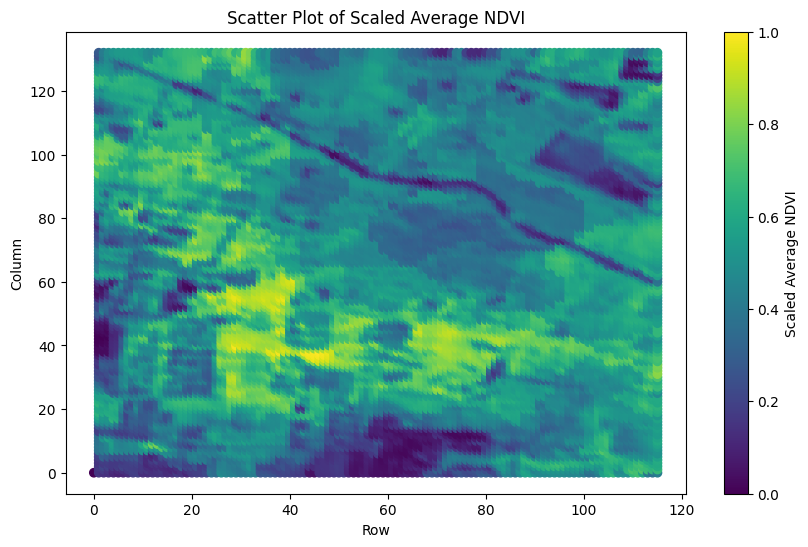

In [ ]:
#normalized/scaled the data in average_ndvi_filtered- visualization of average ndvi by pixel over 5 years

#importing the nessecary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the filtered data from the drive path via pandas library
average_ndvi_filtered = pd.read_csv('/content/drive/MyDrive/StMaryTCandNVDIdata/NDVIData/average_ndvi_filtered.csv')

# Extract the 'avg_ndvi' column
avg_ndvi_values = average_ndvi_filtered['avg_ndvi'].values.reshape(-1, 1)

# normalization using an existing python function
scaler = MinMaxScaler()

# Fit data
scaled_avg_ndvi = scaler.fit_transform(avg_ndvi_values)


# plot
plt.figure(figsize=(10, 6))
plt.scatter(average_ndvi_filtered['row'], average_ndvi_filtered['col'], c=scaled_avg_ndvi, cmap='viridis')
plt.colorbar(label='Scaled Average NDVI')
plt.xlabel('Row')
plt.ylabel('Column')
plt.title('Scatter Plot of Scaled Average NDVI')
plt.show()
